<a href="https://colab.research.google.com/github/RitikDevnani/Amazon-Time-Delivery-Prediction/blob/main/Code/for_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
Importing Libraries
***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import joblib

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***
Import the DataSet
***

In [2]:
file_path_features = '/content/drive/MyDrive/Colab Notebooks/Amazon Delivery Prediction/features.csv'
x = pd.read_csv(file_path_features)

file_path_target = '/content/drive/MyDrive/Colab Notebooks/Amazon Delivery Prediction/target.csv'
y = pd.read_csv(file_path_target)

print(x.head())
print(y.head())

print(x.shape)
print(y.shape)

   Agent_Age  Agent_Rating  Traffic  Weekend  Day_of_Week  Month  Quarter  \
0   1.292759      0.845013        2        1            5      3        1   
1   0.772002     -0.425968        3        0            4      3        1   
2  -1.137438     -0.743714        0        1            5      3        1   
3   1.466344      0.209522        1        0            1      4        2   
4   0.424831     -0.108223        2        1            5      3        1   

   Time_To_Pickup_Minutes  Order_Time_Category  Distance_km  ...  \
0                1.228217                    0    -0.081268  ...   
1               -1.218953                    1    -0.027091  ...   
2                1.228217                    0    -0.085917  ...   
3                0.004632                    1    -0.066222  ...   
4                1.228217                    2    -0.071211  ...   

   Category_Kitchen  Category_Outdoors  Category_Pet Supplies  Category_Shoes  \
0             False              False         

***
Spliting the Testcases
***

In [3]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=64)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.15/0.85, random_state=64)

***
Train the Baseline Model (Linear Regression)
***

In [4]:
#training
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

#validating
pred_lr = lr_model.predict(x_val)

In [5]:
mae = mean_absolute_error(y_val, pred_lr)
mse = mean_squared_error(y_val, pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, pred_lr)

print(f"Linear Regression Performance on Validation Set:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

Linear Regression Performance on Validation Set:
MAE:  26.07
RMSE: 33.25
R²:   0.60


***
Train Random Forest Regression
***

In [6]:
rf_model = RandomForestRegressor(
n_estimators=100,
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
max_features=None,
random_state=64
)
rf_model.fit(x_train, y_train)

pred_rf = rf_model.predict(x_val)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [7]:
mae_rf = mean_absolute_error(y_val, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, pred_rf))
r2_rf = r2_score(y_val, pred_rf)

print(f"Random Forest Performance on Validation Set:")
print(f"MAE:  {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.2f}")

Random Forest Performance on Validation Set:
MAE:  17.59
RMSE: 23.06
R²:   0.81


***
Train SVR
***

In [8]:
svr_model = SVR(
    kernel='rbf',
    C=1.0,
    epsilon=0.1,
    gamma='scale',
    degree=3,
    coef0=0.0,
    shrinking=True,
    tol=1e-3,
    cache_size=200,
    max_iter=-1,
    verbose=False
)
svr_model.fit(x_train, y_train)

pred_svr = svr_model.predict(x_val)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
mae_svr = mean_absolute_error(y_val, pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_val, pred_svr))
r2_svr = r2_score(y_val, pred_svr)

print(f"SVR Performance on Validation Set:")
print(f"MAE:  {mae_svr:.2f}")
print(f"RMSE: {rmse_svr:.2f}")
print(f"R²:   {r2_svr:.2f}")

SVR Performance on Validation Set:
MAE:  27.82
RMSE: 36.00
R²:   0.53


***
For Gradient Boosting
***

In [10]:
gb_model = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=64,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=1e-4,
    ccp_alpha=0.0
)
gb_model.fit(x_train, y_train)

pred_gb = gb_model.predict(x_val)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [11]:
mae_gb = mean_absolute_error(y_val, pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_val, pred_gb))
r2_gb = r2_score(y_val, pred_gb)

print(f"GB Performance on Validation Set:")
print(f"MAE:  {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R²:   {r2_gb:.2f}")

GB Performance on Validation Set:
MAE:  19.90
RMSE: 25.56
R²:   0.76


as best model came out to be Random Forest

***
Evaluating
***

In [14]:
best_model = rf_model

test_pred = best_model.predict(x_test)

mae_test = mean_absolute_error(y_test, test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
r2_test = r2_score(y_test, test_pred)

print(f"Test Set Performance:")
print(f"MAE:  {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²:   {r2_test:.2f}")

Test Set Performance:
MAE:  17.74
RMSE: 22.85
R²:   0.80


***
Visualization
***

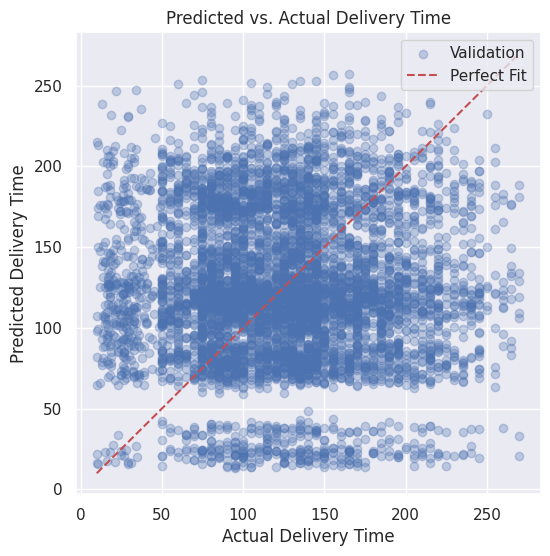

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, test_pred, alpha=0.3, label='Validation')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Predicted vs. Actual Delivery Time')
plt.legend()
plt.show()

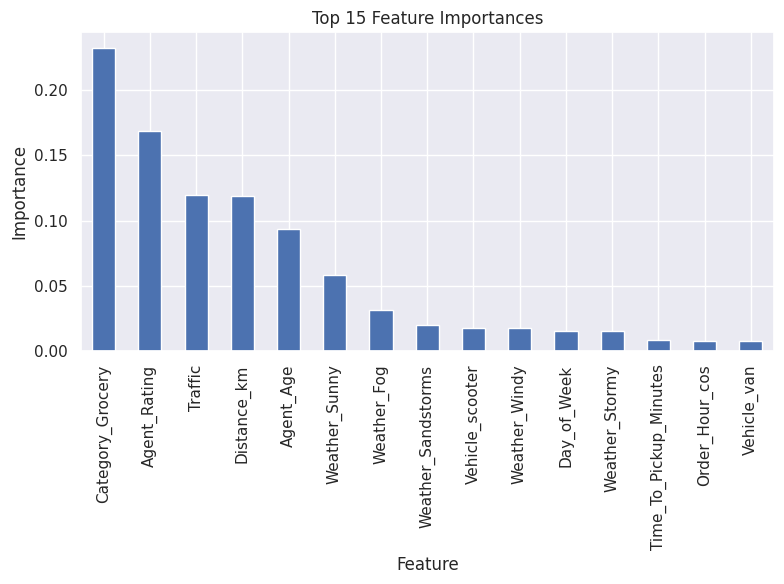

In [16]:
importances = best_model.feature_importances_  # e.g., RandomForestRegressor or GradientBoostingRegressor
feature_names = x_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

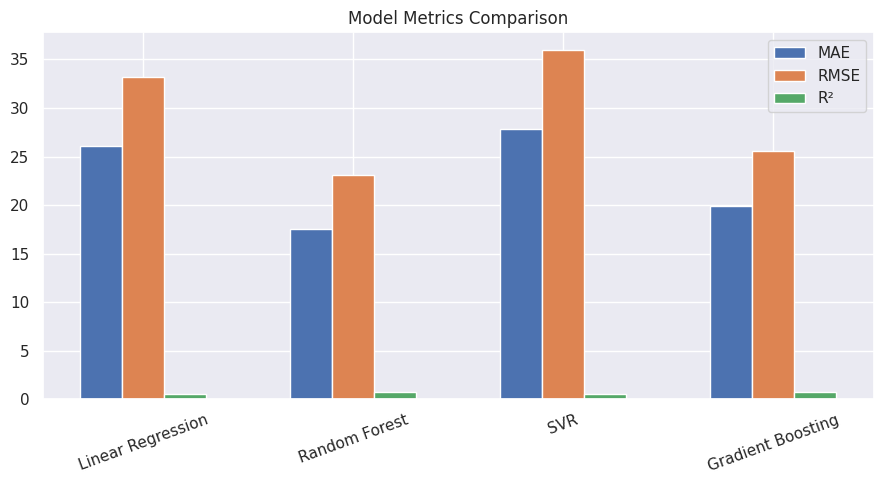

In [17]:
metrics = {
    'Linear Regression': [mae, rmse, r2],
    'Random Forest': [mae_rf, rmse_rf, r2_rf],
    'SVR': [mae_svr, rmse_svr, r2_svr],
    'Gradient Boosting': [mae_gb, rmse_gb, r2_gb]
}
labels = list(metrics.keys())
values = np.array(list(metrics.values())).T

x = np.arange(len(labels))
plt.figure(figsize=(9,5))
plt.bar(x-0.2, values[0], width=0.2, label='MAE')
plt.bar(x, values[1], width=0.2, label='RMSE')
plt.bar(x+0.2, values[2], width=0.2, label='R²')
plt.xticks(x, labels, rotation=20)
plt.title('Model Metrics Comparison')
plt.legend()
plt.tight_layout()
plt.show()

***
Exporting the Best Model
***

In [18]:
#exporting the model
joblib.dump(best_model, 'amazon_delivery_prediction_model.joblib')

#for loading the model
#loaded_model = joblib.load('your_model_filename.joblib')

['amazon_delivery_prediction_model.joblib']